# Pandas Practice Notebook 2 - Shop Customer Analysis

## Business Task

A mid-sized retail chain has implemented a membership card system to better understand how their customers behave. Every time a customer visits the store, their information gets recorded: demographics, profession, spending patterns, family size, and income level.

The company has collected 2,000 customer profiles, but they lack the analytics capabilities to understand to identify high-value customers, understand spending behavior, target promotions effectively, or spot groups at risk of churn.

**Analyze customer traits and behavior to help the business optimize marketing, segmentation, product offerings, and customer retention strategies.**

## Import Libraries & Load the dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/customers_dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Data Exploration

In [3]:
df.shape

(2000, 8)

In [4]:
# Basic statistics
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


**WHY do the minimum value in the Age column is 0?? 🤔 There are few unrealistc values in the dataset.**

In [5]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
# check for null values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

**The column Profession has 35 null values.We need to handle them.✂️**

## Data Cleaning

Renaming the column names to shorter names.

In [7]:
#renaming the columns for convenience
df2 = df.rename(columns={"Annual Income ($)":"AnnualIncome",
              "Spending Score (1-100)":"SpendingScore",
              "Work Experience":"WorkExperience",
              "Family Size":"FamilySize"})
df2.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [8]:
# filling the null values with "Unknown"
df2['Profession'] = df2['Profession'].fillna('Unknown')

# checking for null values
df2.isnull().sum()

CustomerID        0
Gender            0
Age               0
AnnualIncome      0
SpendingScore     0
Profession        0
WorkExperience    0
FamilySize        0
dtype: int64

💡**35 customers were missing Profession data. Instead of removing these customers (which would reduce sample size and distort demographics), I replaced missing profession values with “Unknown”, consistent with consumer analytics best practice"** 

In [9]:
# remove rows with customers below 16 and unrealistic work experiences
customer_df = df2[(df2["Age"]>16) & (df2["WorkExperience"]<= (df2["Age"]-14))]
customer_df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


💡**The dataset includes customers below age 16 , even 0 years olds. So I removed customers below age 16 (minimum realistic membership age), and also  rows where work experience exceeded the maximum possible value (Age − 14).**

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      1633 non-null   int64 
 1   Gender          1633 non-null   object
 2   Age             1633 non-null   int64 
 3   AnnualIncome    1633 non-null   int64 
 4   SpendingScore   1633 non-null   int64 
 5   Profession      1633 non-null   object
 6   WorkExperience  1633 non-null   int64 
 7   FamilySize      1633 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 114.8+ KB


**Now the dataset looks clean and simple to work! 🎉😎**

## Questions And Solutions

### Q1. Which age groups make up most of our customers?

First, let's create bins for the different age groups.

In [11]:
# Age bins
age_bins=[16,30,50,65,100]
age_labels = ['16-30', '30-50', '50-65', '65+']

In [12]:
customer_df['AgeGroup'] =pd.cut(customer_df['Age'],
                                bins=age_bins,
                                labels=age_labels,
                                 include_lowest=True)

In [13]:
# count the customers in each group
customer_df["AgeGroup"].value_counts().sort_index()

AgeGroup
16-30    251
30-50    424
50-65    317
65+      641
Name: count, dtype: int64

❓**641 customers aged 65+ ! Is that realistic or not?? 🤔  
Let's inspect the dataset again !**

In [14]:
customer_df['Age'].describe()

count    1633.000000
mean       57.810778
std        23.535415
min        17.000000
25%        37.000000
50%        58.000000
75%        79.000000
max        99.000000
Name: Age, dtype: float64

**The dataset contains a very large number of customers aged 65 and above. The maximum age is 99.This is not typical for a retail store and suggests the data may be synthetic or not fully realistic.  
To keep the analysis meaningful,we’ll clean the data by keeping ages between 16 and 75. This range reflects the age group most likely to hold store memberships and make regular purchases.**

In [15]:
customer_df=customer_df[customer_df['Age']<=75]

customer_df["AgeGroup"].value_counts().sort_index()
customer_df.shape

(1170, 9)

After cleaning unrealistic ages and restricting the range to 16–75, the age structure becomes more consistent with real-world retail demographics

**Solution:**  
**30–50 is the largest customer group and should be the primary focus for marketing.**

### Q2. Do men or women spend more?

In [16]:
# grouping the gender
gender_spendscore= customer_df.groupby("Gender")["SpendingScore"].describe()
gender_spendscore

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,698.0,50.378223,27.366636,1.0,28.0,49.0,73.00,100.0
Male,472.0,50.703390,27.613748,1.0,28.0,50.0,73.25,100.0


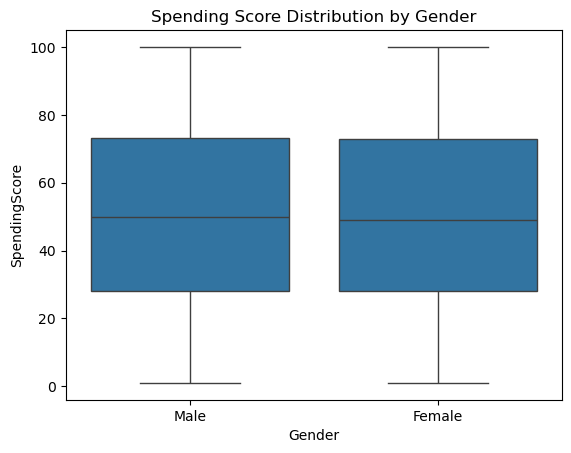

In [17]:
sns.boxplot(data=customer_df, x="Gender", y="SpendingScore")
plt.title("Spending Score Distribution by Gender")
plt.show()

**Solution:**  
**Spending behavior appears gender-neutral. The mean spending score for females (50.38) and males (50.70) is nearly identical. Median values (49 vs. 50) and similar standard deviations (~27.5) further confirm that spending distributions overlap strongly.**

**Gender is not a useful predictor of spending in this dataset, so marketing should prioritize segmentation based on age, income, or profession instead of gender.**

### Q3. Which income bracket dominates our customer base?

Let's first understand the income range.

In [18]:
customer_df['AnnualIncome'].describe()

count      1170.000000
mean     106164.217094
std       47272.803564
min           0.000000
25%       70463.000000
50%      101852.000000
75%      146153.250000
max      189945.000000
Name: AnnualIncome, dtype: float64

This tells us the minimum and maximun income range. Now let's create income bins.

In [19]:
# create income bins and labels
income_bins = [0, 40000, 80000, 200000]
income_labels = ['Lower Income', 'Middle Income', 'Higher Income']

In [20]:
# creating new column for the income tiers
customer_df['IncomeTier'] = pd.cut(
    customer_df['AnnualIncome'],
    bins=income_bins,
    labels=income_labels,
    right=False
)

In [21]:
# count of the customers in each group
customer_df['IncomeTier'].value_counts().sort_index()

IncomeTier
Lower Income      88
Middle Income    296
Higher Income    786
Name: count, dtype: int64

**Solution:**  
**Most of our customers fall into the Higher Income tier(786 out of 1,170)**

**Marketing strategy should emphasize premium products, exclusive offers, and loyalty programs tailored for high-spending, affluent shoppers. The middle-income group is still sizable and represents a secondary target for value-driven bundles or seasonal discounts.**

### Q4. Who are the “high-potential but low-spend” customers?

“High-potential but low-spend” customers are customers who have high income (high purchasing power) but low spending scores (low engagement).

So, the conditions are 
* High income means "Higher Income" in IncomeTier.
* Low spend can be SpendingScore < 40.

In [22]:
high_potential= customer_df[(customer_df['IncomeTier']=="Higher Income") & (customer_df['SpendingScore']<40)]
high_potential.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize,AgeGroup,IncomeTier
2,3,Female,20,86000,6,Engineer,1,1,16-30,Higher Income
8,9,Male,64,97000,3,Engineer,0,3,50-65,Higher Income
12,13,Female,58,80000,15,Executive,0,5,50-65,Higher Income
20,21,Male,35,96000,35,Homemaker,12,1,30-50,Higher Income
34,35,Female,49,91000,14,Lawyer,1,2,30-50,Higher Income


**Solution:**  
**We identified the “High-potential but low-spend customers who can afford more but currently underutilize the store, making them prime candidates for tailored promotions, personalized recommendations, and loyalty incentives. Improving engagement in this segment can significantly lift revenue without needing to acquire new customers.**

### Q5. Which professions spend the most?

In [23]:
profession_spend = customer_df.groupby("Profession")["SpendingScore"].mean()
profession_spend.sort_values(ascending=False)

Profession
Artist           53.498607
Entertainment    51.492537
Engineer         50.640777
Doctor           50.326316
Unknown          50.300000
Marketing        49.978723
Healthcare       49.763285
Executive        46.662921
Lawyer           46.256098
Homemaker        40.911765
Name: SpendingScore, dtype: float64

**Solution:**  
**Creative fields such as Artists and Entertainment professionals show the highest spending levels.**

### Q6. Do younger customers spend more?

In [24]:
age_spendscore = customer_df.groupby("AgeGroup")["SpendingScore"].mean()
age_spendscore.sort_values(ascending=False)

AgeGroup
16-30    53.043825
50-65    50.476341
30-50    49.518868
65+      49.353933
Name: SpendingScore, dtype: float64

**Solution:**  
**Younger customers (16–30) have the highest average spending score.**

### Q7. Do highly experienced workers spend less?

Let's check the minimum and maximum values and range of the Work Experience column

In [25]:
customer_df['WorkExperience'].describe()

count    1170.000000
mean        3.789744
std         3.718757
min         0.000000
25%         1.000000
50%         2.000000
75%         7.000000
max        17.000000
Name: WorkExperience, dtype: float64

In [26]:
# create experience bins and labels
exp_bins = [0, 5, 10, 17]
exp_labels = ['0-5 yrs', '6-10 yrs','10+ yrs']

In [27]:
# creating experience groups
customer_df['ExperienceGroup'] = pd.cut(
    customer_df['WorkExperience'],
    bins=exp_bins,
    labels=exp_labels,
    right=False
)

In [28]:
#checking the count of customers in each group
customer_df['ExperienceGroup'].value_counts()

ExperienceGroup
0-5 yrs     700
6-10 yrs    393
10+ yrs      76
Name: count, dtype: int64

In [29]:
#comparing the average spending score
exp_grp_spend = customer_df.groupby("ExperienceGroup")["SpendingScore"].mean()
exp_grp_spend

ExperienceGroup
0-5 yrs     50.212857
6-10 yrs    50.707379
10+ yrs     52.736842
Name: SpendingScore, dtype: float64

**Solution:**  
**Contrary to typical retail behavior, customers with more work experience spend slightly more than early-career customers. The group with 10+ years of experience has the highest average spending score.**